## SF Crime database

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sframe 

### Reading the original data set in csv format. I use sframe which is pretty similar to pandas.

In [26]:
sf=sframe.SFrame(data='train.csv')
#You can use pandas like this:
#import pandas as pd
#sf_pd=pd.read_csv('train.csv')

PROGRESS: Finished parsing file /Users/Mehdi/Downloads/SF-Crime-Kaggle/train.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.793667 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str,str,str,str,str,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Read 360690 lines. Lines per second: 362759
PROGRESS: Finished parsing file /Users/Mehdi/Downloads/SF-Crime-Kaggle/train.csv
PROGRESS: Parsing completed. Parsed 878049 lines in 1.68809 secs.


In [42]:
sf

Columns:
	Dates	str
	Category	str
	Descript	str
	DayOfWeek	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	float
	Y	float

Rows: 878049

Data:
+---------------------+----------------+--------------------------------+
|        Dates        |    Category    |            Descript            |
+---------------------+----------------+--------------------------------+
| 2015-05-13 23:53:00 |    WARRANTS    |         WARRANT ARREST         |
| 2015-05-13 23:53:00 | OTHER OFFENSES |    TRAFFIC VIOLATION ARREST    |
| 2015-05-13 23:33:00 | OTHER OFFENSES |    TRAFFIC VIOLATION ARREST    |
| 2015-05-13 23:30:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:30:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:30:00 | LARCENY/THEFT  | GRAND THEFT FROM UNLOCKED AUTO |
| 2015-05-13 23:30:00 | VEHICLE THEFT  |       STOLEN AUTOMOBILE        |
| 2015-05-13 23:30:00 | VEHICLE THEFT  |       STOLEN AUTOMOBILE        |
| 2015-05-13 23:00:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:00:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
+---------------------+----------------+--------------------------------+
+-----------+------------+----------------+-------------------------------+
| DayOfWeek | PdDistrict |   Resolution   |            Address            |
+-----------+------------+----------------+-------------------------------+
| Wednesday |  NORTHERN  | ARREST, BOOKED |       OAK ST / LAGUNA ST      |
| Wednesday |  NORTHERN  | ARREST, BOOKED |       OAK ST / LAGUNA ST      |
| Wednesday |  NORTHERN  | ARREST, BOOKED |   VANNESS AV / GREENWICH ST   |
| Wednesday |  NORTHERN  |      NONE      |    1500 Block of LOMBARD ST   |
| Wednesday |    PARK    |      NONE      |   100 Block of BRODERICK ST   |
| Wednesday | INGLESIDE  |      NONE      |      0 Block of TEDDY AV      |
| Wednesday | INGLESIDE  |      NONE      |      AVALON AV / PERU AV      |
| Wednesday |  BAYVIEW   |      NONE      |    KIRKWOOD AV / DONAHUE ST   |
| Wednesday |  RICHMOND  |      NONE      |      600 Block of 47TH AV     |
| Wednesday |  CENTRAL   |      NONE      | JEFFERSON ST / LEAVENWORTH ST |
+-----------+------------+----------------+-------------------------------+
+----------------+---------------+
|       X        |       Y       |
+----------------+---------------+
| -122.425891675 | 37.7745985957 |
| -122.425891675 | 37.7745985957 |
| -122.424363021 |  37.800414322 |
| -122.426995327 | 37.8008726328 |
| -122.438737623 | 37.7715411721 |
| -122.403252361 | 37.7134307041 |
| -122.423326977 | 37.7251380404 |
| -122.371274317 |  37.727564072 |
| -122.508194031 | 37.7766012607 |
| -122.419087677 | 37.8078015517 |
+----------------+---------------+
[878049 rows x 9 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### Separating the month, day and hour from the Dates column

In [27]:
sfDate=sf['Dates']
m = []
d = []
h = []
for i in sfDate:
    m.append(int(i[5:7]))
    d.append((int(i[5:7])-1)*30+int(i[8:10]))
    h.append(int(i[11:13]))
sa = sframe.SArray(m)
sd = sframe.SArray(d)
sh = sframe.SArray(h)
sf.add_column(sa, name='Month')
sf.add_column(sd, name='Day')
sf.add_column(sh, name='Hour')


Columns:
	Dates	str
	Category	str
	Descript	str
	DayOfWeek	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	float
	Y	float
	Month	int
	Day	int
	Hour	int

Rows: 878049

Data:
+---------------------+----------------+--------------------------------+
|        Dates        |    Category    |            Descript            |
+---------------------+----------------+--------------------------------+
| 2015-05-13 23:53:00 |    WARRANTS    |         WARRANT ARREST         |
| 2015-05-13 23:53:00 | OTHER OFFENSES |    TRAFFIC VIOLATION ARREST    |
| 2015-05-13 23:33:00 | OTHER OFFENSES |    TRAFFIC VIOLATION ARREST    |
| 2015-05-13 23:30:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:30:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:30:00 | LARCENY/THEFT  | GRAND THEFT FROM UNLOCKED AUTO |
| 2015-05-13 23:30:00 | VEHICLE THEFT  |       STOLEN AUTOMOBILE        |
| 2015-05-13 23:30:00 | VEHICLE THEFT  |       STOLEN AUTOMOBILE        |
| 2015-05-13 23:00:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:00:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
+---------------------+----------------+--------------------------------+
+-----------+------------+----------------+-------------------------------+
| DayOfWeek | PdDistrict |   Resolution   |            Address            |
+-----------+------------+----------------+-------------------------------+
| Wednesday |  NORTHERN  | ARREST, BOOKED |       OAK ST / LAGUNA ST      |
| Wednesday |  NORTHERN  | ARREST, BOOKED |       OAK ST / LAGUNA ST      |
| Wednesday |  NORTHERN  | ARREST, BOOKED |   VANNESS AV / GREENWICH ST   |
| Wednesday |  NORTHERN  |      NONE      |    1500 Block of LOMBARD ST   |
| Wednesday |    PARK    |      NONE      |   100 Block of BRODERICK ST   |
| Wednesday | INGLESIDE  |      NONE      |      0 Block of TEDDY AV      |
| Wednesday | INGLESIDE  |      NONE      |      AVALON AV / PERU AV      |
| Wednesday |  BAYVIEW   |      NONE      |    KIRKWOOD AV / DONAHUE ST   |
| Wednesday |  RICHMOND  |      NONE      |      600 Block of 47TH AV     |
| Wednesday |  CENTRAL   |      NONE      | JEFFERSON ST / LEAVENWORTH ST |
+-----------+------------+----------------+-------------------------------+
+----------------+---------------+-------+-----+------+
|       X        |       Y       | Month | Day | Hour |
+----------------+---------------+-------+-----+------+
| -122.425891675 | 37.7745985957 |   5   | 133 |  23  |
| -122.425891675 | 37.7745985957 |   5   | 133 |  23  |
| -122.424363021 |  37.800414322 |   5   | 133 |  23  |
| -122.426995327 | 37.8008726328 |   5   | 133 |  23  |
| -122.438737623 | 37.7715411721 |   5   | 133 |  23  |
| -122.403252361 | 37.7134307041 |   5   | 133 |  23  |
| -122.423326977 | 37.7251380404 |   5   | 133 |  23  |
| -122.371274317 |  37.727564072 |   5   | 133 |  23  |
| -122.508194031 | 37.7766012607 |   5   | 133 |  23  |
| -122.419087677 | 37.8078015517 |   5   | 133 |  23  |
+----------------+---------------+-------+-----+------+
[878049 rows x 12 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

#### Another methos to split the DATE and make for example the time. 

In [28]:
def splittime(date):
    h=int(date[11:13])
    minute=int(date[14:16])
    time=h+minute/60.0
    return time
sf['Time']=sf['Dates'].apply(splittime)


### I want to have a column for week days but as numbers.

In [29]:
def changetonum(Daystring):
    if Daystring== 'Monday':
        return 1
    elif Daystring== 'Tuesday':
        return 2
    elif Daystring== 'Wednesday':
        return 3
    elif Daystring== 'Thursday':
        return 4
    elif Daystring== 'Friday':
        return 5
    elif Daystring== 'Saturday':
        return 6
    else:
        return 7
sf['numdayofweek']=sf['DayOfWeek'].apply(changetonum)

sf

Columns:
	Dates	str
	Category	str
	Descript	str
	DayOfWeek	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	float
	Y	float
	Month	int
	Day	int
	Hour	int
	Time	float
	numdayofweek	int

Rows: 878049

Data:
+---------------------+----------------+--------------------------------+
|        Dates        |    Category    |            Descript            |
+---------------------+----------------+--------------------------------+
| 2015-05-13 23:53:00 |    WARRANTS    |         WARRANT ARREST         |
| 2015-05-13 23:53:00 | OTHER OFFENSES |    TRAFFIC VIOLATION ARREST    |
| 2015-05-13 23:33:00 | OTHER OFFENSES |    TRAFFIC VIOLATION ARREST    |
| 2015-05-13 23:30:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:30:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:30:00 | LARCENY/THEFT  | GRAND THEFT FROM UNLOCKED AUTO |
| 2015-05-13 23:30:00 | VEHICLE THEFT  |       STOLEN AUTOMOBILE        |
| 2015-05-13 23:30:00 | VEHICLE THEFT  |       STOLEN AUTOMOBILE        |
| 2015-05-13 23:00:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
| 2015-05-13 23:00:00 | LARCENY/THEFT  |  GRAND THEFT FROM LOCKED AUTO  |
+---------------------+----------------+--------------------------------+
+-----------+------------+----------------+-------------------------------+
| DayOfWeek | PdDistrict |   Resolution   |            Address            |
+-----------+------------+----------------+-------------------------------+
| Wednesday |  NORTHERN  | ARREST, BOOKED |       OAK ST / LAGUNA ST      |
| Wednesday |  NORTHERN  | ARREST, BOOKED |       OAK ST / LAGUNA ST      |
| Wednesday |  NORTHERN  | ARREST, BOOKED |   VANNESS AV / GREENWICH ST   |
| Wednesday |  NORTHERN  |      NONE      |    1500 Block of LOMBARD ST   |
| Wednesday |    PARK    |      NONE      |   100 Block of BRODERICK ST   |
| Wednesday | INGLESIDE  |      NONE      |      0 Block of TEDDY AV      |
| Wednesday | INGLESIDE  |      NONE      |      AVALON AV / PERU AV      |
| Wednesday |  BAYVIEW   |      NONE      |    KIRKWOOD AV / DONAHUE ST   |
| Wednesday |  RICHMOND  |      NONE      |      600 Block of 47TH AV     |
| Wednesday |  CENTRAL   |      NONE      | JEFFERSON ST / LEAVENWORTH ST |
+-----------+------------+----------------+-------------------------------+
+----------------+---------------+-------+-----+------+---------------+--------------+
|       X        |       Y       | Month | Day | Hour |      Time     | numdayofweek |
+----------------+---------------+-------+-----+------+---------------+--------------+
| -122.425891675 | 37.7745985957 |   5   | 133 |  23  | 23.8833333333 |      3       |
| -122.425891675 | 37.7745985957 |   5   | 133 |  23  | 23.8833333333 |      3       |
| -122.424363021 |  37.800414322 |   5   | 133 |  23  |     23.55     |      3       |
| -122.426995327 | 37.8008726328 |   5   | 133 |  23  |      23.5     |      3       |
| -122.438737623 | 37.7715411721 |   5   | 133 |  23  |      23.5     |      3       |
| -122.403252361 | 37.7134307041 |   5   | 133 |  23  |      23.5     |      3       |
| -122.423326977 | 37.7251380404 |   5   | 133 |  23  |      23.5     |      3       |
| -122.371274317 |  37.727564072 |   5   | 133 |  23  |      23.5     |      3       |
| -122.508194031 | 37.7766012607 |   5   | 133 |  23  |      23.0     |      3       |
| -122.419087677 | 37.8078015517 |   5   | 133 |  23  |      23.0     |      3       |
+----------------+---------------+-------+-----+------+---------------+--------------+
[878049 rows x 14 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### Identifying unique crime categories

In [30]:
unique_cat=sf['Category'].unique()
for i in range(len(unique_cat)):
    print i, unique_cat[i]

0 EXTORTION
1 VANDALISM
2 DRIVING UNDER THE INFLUENCE
3 SEX OFFENSES NON FORCIBLE
4 PORNOGRAPHY/OBSCENE MAT
5 BAD CHECKS
6 SECONDARY CODES
7 DRUNKENNESS
8 STOLEN PROPERTY
9 ROBBERY
10 TRESPASS
11 RECOVERED VEHICLE
12 SEX OFFENSES FORCIBLE
13 NON-CRIMINAL
14 LIQUOR LAWS
15 SUSPICIOUS OCC
16 BRIBERY
17 TREA
18 KIDNAPPING
19 EMBEZZLEMENT
20 ARSON
21 DISORDERLY CONDUCT
22 LARCENY/THEFT
23 DRUG/NARCOTIC
24 FRAUD
25 MISSING PERSON
26 BURGLARY
27 WARRANTS
28 FORGERY/COUNTERFEITING
29 RUNAWAY
30 LOITERING
31 VEHICLE THEFT
32 ASSAULT
33 GAMBLING
34 SUICIDE
35 WEAPON LAWS
36 OTHER OFFENSES
37 PROSTITUTION
38 FAMILY OFFENSES


### Separating each crime Category

In [31]:
# Here I brake the main data set into 39 smaller ones based on their crime category.
j=0
for i in unique_cat: 
    name='sfcat'+str(j)
    vars()[name]=sf[sf['Category']==i] 
    j=j+1

### Plotting the crime coordinates on top of the city map.
The city map can be downloaded from http://www.openstreetmap.org/
I have used a routine called smopy which gets the lat, lon and zoom level and automatically download the requested map. You can read more about smopy from here: http://pydoc.net/Python/smopy/0.0.3/smopy/


In [6]:
import smopy

In [37]:
map = smopy.Map((37.7, -122.5, 37.8193 , -122.35), z=14)
# We can show/save the downloaded map. 
map.save_png('SF_37.7-122.5+37.8193-122.35-z14.png')
#map.show_ipython()

In [8]:
# We convert the map to a numpy 3D array
sfmap=map.to_numpy()
print np.shape(sfmap)


(2048, 2048, 3)


### Defining a function to convert the latitude, londtitude coordinates to the pixel frame work of the map.
Note: The scaling coefficients must be manually calculated for each map.

In [9]:
def lattoxy(lon,lat):
    scy1=(170.0-1835.0)/(37.811249-37.698564)
    scy2=170.0-scy1*37.811249
    y=scy1*lat+scy2
    scx1=(1840.0-290.0)/(-122.361534+122.494835)
    scx2=290.0-scx1*(-122.494835)
    x=scx1*lon+scx2
    return x,y

### Plotting the crime category "DRIVING UNDER THE INFLUENCE" 

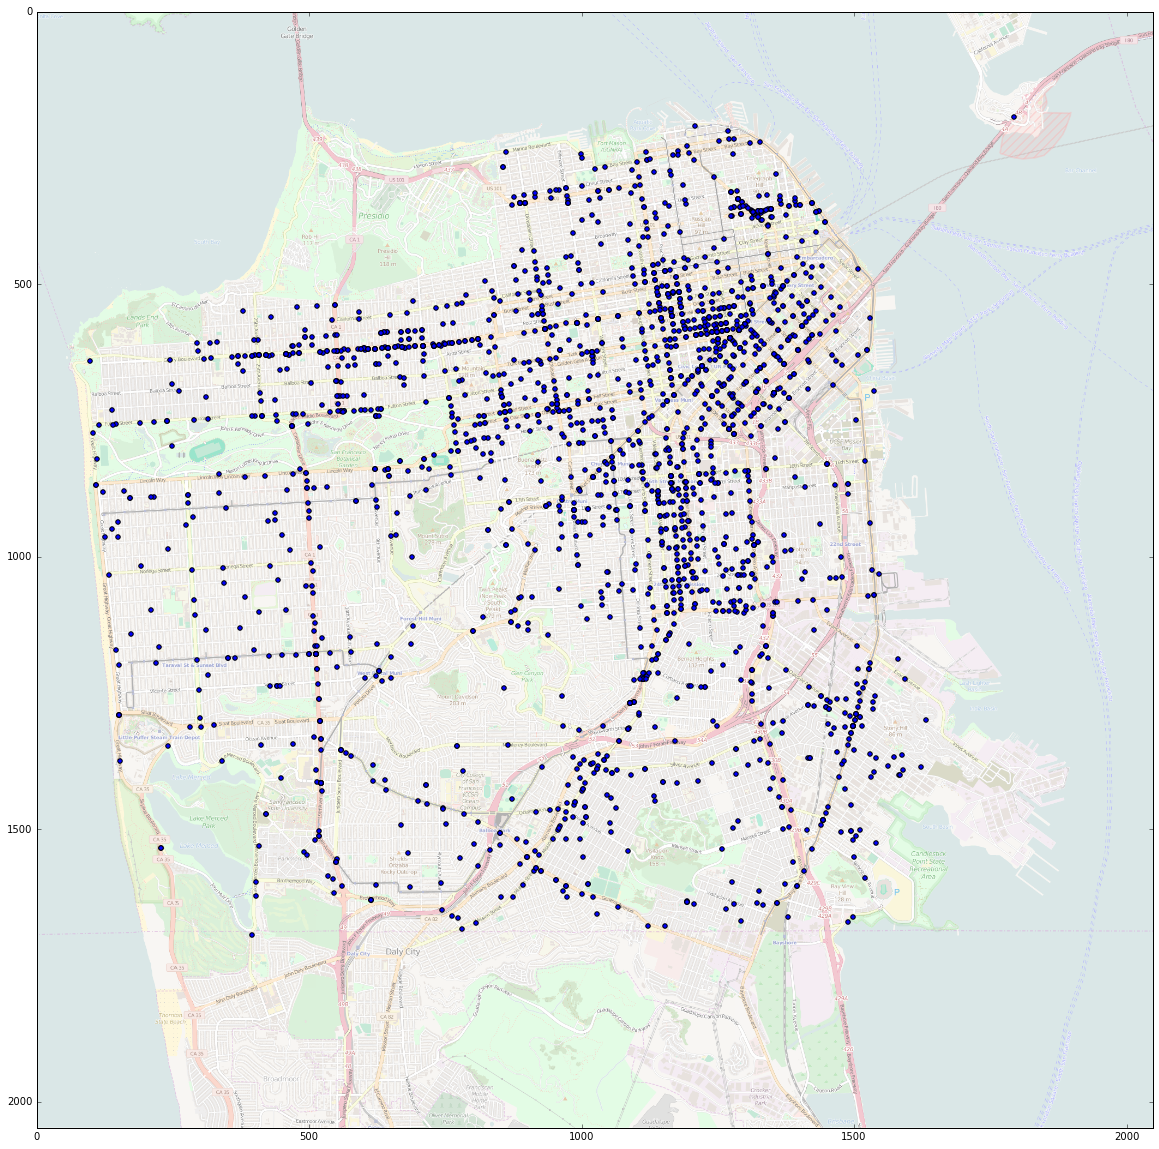

In [15]:
fig=plt.figure(figsize=(20, 20))
plt.ylim(2048,0)
plt.xlim(0,2048)
lon2=sfcat2['X'].to_numpy()
lat2=sfcat2['Y'].to_numpy()
x,y=lattoxy(lon2,lat2)
plt.imshow(sfmap,alpha=0.5)
plt.scatter(x, y)
plt.show()

## Another approach, a better one!
Here I use the bokeh interactive library and Google maps.  

In [17]:
from bokeh.plotting import figure, output_file, show,output_notebook
from bokeh.resources import INLINE
from bokeh.models import (Plot, ColumnDataSource, DataRange1d, FactorRange,LinearAxis, CategoricalAxis, Grid, Legend,SingleIntervalTicker)

### Making a numpy array from the lon and lat coordinates of all crime categories
So, we can choose any of the categories and plot it.

In [32]:
for i in range(39): 
    name='sfcat'+str(i)
    lat='lat'+str(i)
    lon='lon'+str(i)
    vars()[lon]=vars()[name]['X'].to_numpy() 
    vars()[lat]=vars()[name]['Y'].to_numpy()

Here I use the GMapplot from the Bokeh.models Which enables us to retrieve the Google map of the corresponding coordinate. Note that unlike the previous approach the Google map is not an image. So, we don't need to convert the lon, lat coordinates to pixel refrence point. Moreover, this new figure is interactive. One can zoom in and out, and hover through the data points whcih makes it quite useful for showing the over-dense regions next to the low density areas. 

I only show 3 crime categories as an example. 


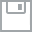
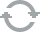
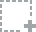
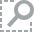
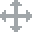
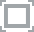
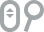
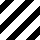
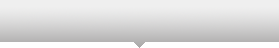
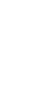
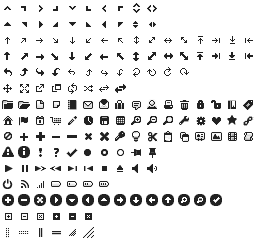
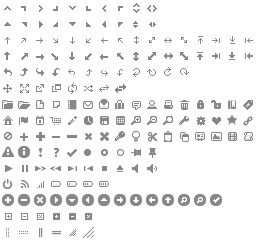
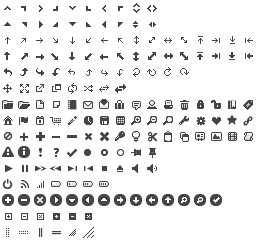
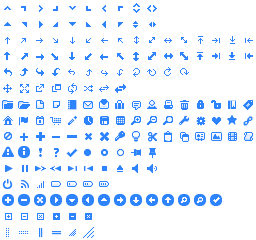
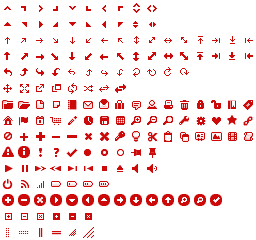
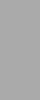
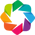
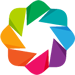

In [36]:
from bokeh.models import (Plot,Legend,Grid,GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool,ResizeTool,PreviewSaveTool,BoxZoomTool,HoverTool)
map_options = GMapOptions(lat=37.75, lng=-122.42, map_type="roadmap", zoom=12)
plot=GMapPlot(x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options, title="San Francisco Crime Map")

dui= ColumnDataSource(data=dict(lat=lat2,lon=lon2,cat=sfcat2['Category'],date=sfcat2['Dates']))
prost= ColumnDataSource(data=dict(lat=lat37,lon=lon37,cat=sfcat37['Category'],date=sfcat37['Dates']))
SUICIDE=ColumnDataSource(data=dict(lat=lat34,lon=lon34,cat=sfcat34['Category'],date=sfcat34['Dates']))

circle = Circle(x="lon", y="lat", size=4, fill_color="blue", fill_alpha=0.5, line_color=None)
circle2 = Circle(x="lon", y="lat", size=4, fill_color='red', fill_alpha=0.5, line_color=None)
circle34 = Circle(x="lon", y="lat", size=4, fill_color='lime', fill_alpha=0.5, line_color=None)

dui_plot=plot.add_glyph(dui, circle)
prost_plot=plot.add_glyph(prost, circle2)
suicide_plot=plot.add_glyph(SUICIDE, circle34)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(),PreviewSaveTool(),HoverTool())
hover = plot.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [("Category", "@cat"),("Date", "@date"),("(Long, Lat)", "($x, $y)"),]
plot.add_layout(Legend(legends=[("PROSTITUTION", [prost_plot]),("DUI", [dui_plot]),("SUICIDE", [suicide_plot])]))

output_notebook()
#output_file("gmap_plot.html")
#show(plot)
#I don't show it because the file gets too big for displaying in my Git!

### Now Lets plot the weekly probability density distribution of these 3 crime categories. 
I used the data the whole city, and all years and months, just look at the occurence day and time of each crime. 
The result is interesting. Apparently, each day DUI peaks after midnight with the largest probability at Friday and Saturday. However, The peak of prostitution is during the week! The suicide has lower statistic. We still can see the peridoc behavior though. It is kind of surprising (to me at least) that the peak of the suicide is not during the dark hours! 


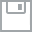
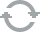
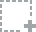
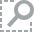
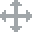
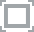
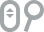
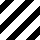
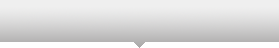
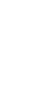
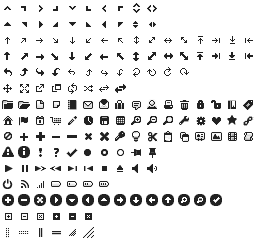
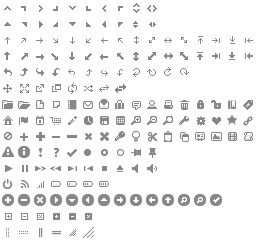
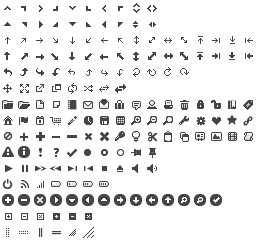
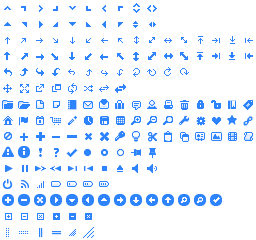
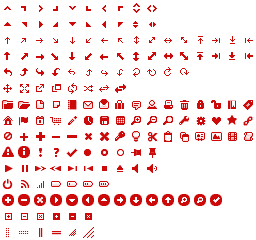
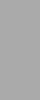
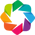
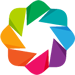

In [35]:
p1 = figure(width=900,height=660)#x_axis_type = "datetime")
p1.xaxis.axis_label ='Week Day'
p1.yaxis.axis_label ='Probability Density'

#sfcat34_2014=sfcat34[sfcat34['Year']==2014]
time34=sfcat34['numdayofweek'].to_numpy()+sfcat34['Time'].to_numpy()/24.0-1
first34=np.min(time34)
end34=np.max(time34)
numbin34=int(end34-first34)*4
number34, timebin34=np.histogram(time34, bins=numbin34,density=True)
halfbin34=(timebin34[1]-timebin34[0])/2.0
timebin34=timebin34[1:]-halfbin34

#sfcat37_2014=sfcat37[sfcat37['Year']==2014]
time37=sfcat37['numdayofweek'].to_numpy()+sfcat37['Time'].to_numpy()/24.0-1
first37=np.min(time37)
end37=np.max(time37)
numbin37=int(end37-first37)*8
number37, timebin37=np.histogram(time37, bins=numbin37,density=True)
halfbin37=(timebin37[1]-timebin37[0])/2.0
timebin37=timebin37[1:]-halfbin37
#sfcat2_2014=sfcat2[sfcat2['Year']==2014]
time2=sfcat2['numdayofweek'].to_numpy()+sfcat2['Time'].to_numpy()/24.0-1
first2=np.min(time2)
end2=np.max(time2)
numbin2=int(end2-first2)*8
number2, timebin2=np.histogram(time2, bins=numbin2,density=True)
halfbin2=(timebin2[1]-timebin2[0])/2.0
timebin2=timebin2[1:]-halfbin2

p1.line(timebin37, number37, color='red', legend=sfcat37['Category'][0],line_width=2)
p1.line(timebin2, number2, color='blue', legend=sfcat2['Category'][0],line_width=2)
p1.line(timebin34, number34, color='lime', legend=sfcat34['Category'][0],line_width=2)
p1.quad(top=[0.7, 0.7, 0.7,0.7,0.7,0.7,0.7,0.7], bottom=[0, 0, 0,0,0,0,0,0], left=[0, 0.75, 1.75,2.75,3.75,4.75,5.75,6.75],
    right=[0.25, 1.25, 2.25, 3.25,4.25,5.25,6.25,7.0], color="gray",alpha=0.5,legend='Night Time (6 PM to 6 AM)')
#output_file("WeekDayCrime.html")
output_notebook()
show(p1)